In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [74]:
## reflect an existing database into a new model
# Declaring a Base
Base = automap_base()

## reflect the tables
Base.prepare(engine, reflect=True)

# Save references to classes in data
# Print all the classes mapped to the Base
print(Base.classes.keys())
automap_base().prepare(engine, reflect=True)

# Save reference to classes, 'measurement' and 'station'.
Measurements = Base.classes.measurement
Stations = Base.classes.station

['measurement', 'station']


In [8]:
## We can view all of the classes that automap found

# Refer above for code

In [9]:
## Save references to each table

# Refer above

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [29]:
# Inspect columns of measurements and stations
inspector = inspect(engine)
print(inspector.get_table_names())

columns_measurements = inspector.get_columns('measurement')
print(f'measurement class:')
for column in columns_measurements:
    print(column['name'], column['type'])

columns_stations = inspector.get_columns('station')
print(f'station class:')
for column in columns_stations:
    print(column['name'], column['type'])

['measurement', 'station']
measurement class:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
station class:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [43]:

sel1 = [Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs, Stations.station, Stations.name, Stations.latitude, Stations.longitude, Stations.elevation]
same_station = session.query(*sel1).filter(Measurements.station == Stations.station).all()


same_station


[('USC00519397', '2010-01-01', 0.08, 65.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-06', None, 73.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', '2010-01-11', 0.0

# Exploratory Climate Analysis

In [103]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results

## Calculate the date 1 year ago from the last data point in the database
# Retrieve 1st date of data:
print(f'Oldest date in data: {session.query(Measurements.date).order_by(Measurements.date).first()}')
print(f'Most recent date in data: {session.query(Measurements.date).order_by(Measurements.date.desc()).first()}')
date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(f'Date 1 year prior to latest date in data is: {date}')

Oldest date in data: ('2010-01-01',)
Most recent date in data: ('2017-08-23',)
Date 1 year prior to latest date in data is: 2016-08-23 00:00:00


In [104]:
## Perform a query to retrieve the data and precipitation scores
sel = [Measurements.date, Measurements.prcp]
date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(date)

daily_prcp = session.query(*sel).order_by(Measurements.date.asc()).\
    filter(Measurements.date >= date).all()
daily_prcp


2016-08-23 00:00:00


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [118]:
## Save the query results as a Pandas DataFrame and set the index to the date column
daily_prcp_df = pd.DataFrame(daily_prcp, columns=["Date", "Precipitation_scores"])

daily_prcp_df.set_index("Date", inplace= True)

print(daily_prcp_df)

            Precipitation_scores
Date                            
2016-08-24                  0.08
2016-08-24                  2.15
2016-08-24                  2.28
2016-08-24                   NaN
2016-08-24                  1.22
...                          ...
2017-08-22                  0.50
2017-08-23                  0.00
2017-08-23                  0.00
2017-08-23                  0.08
2017-08-23                  0.45

[2223 rows x 1 columns]


In [119]:
## Sort the dataframe by date
# Note already done above, but if it wasn't this is the code that was reset the index.
sorted_prcep_df = daily_prcp_df.sort_values("Date", ascending=True)
sorted_prcep_df

,Precipitation_scores
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


            Precipitation_scores
Date                            
2016-08-24                  0.08
2016-08-24                  2.15
2016-08-24                  2.28
2016-08-24                   NaN
2016-08-24                  1.22
...                          ...
2017-08-22                  0.50
2017-08-23                  0.08
2017-08-23                  0.00
2017-08-23                  0.00
2017-08-23                  0.45

[2223 rows x 1 columns]


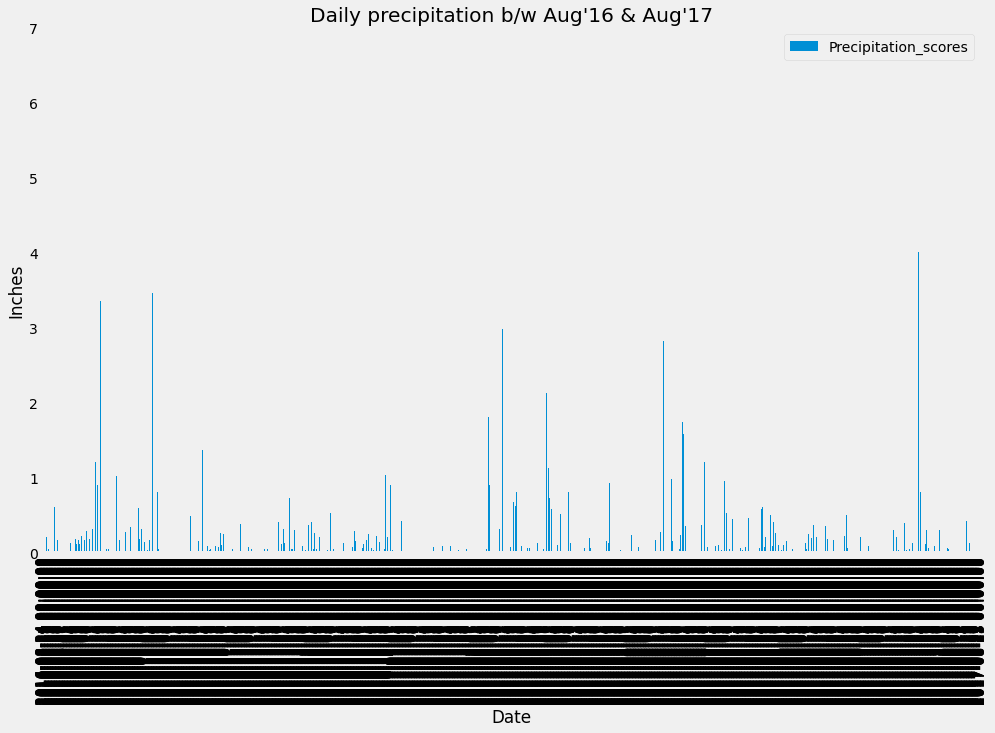

In [124]:
## Use Pandas Plotting with Matplotlib to plot the data
# First, convert date column (text), to data type (datetime), so formatting conducive to plotting
sorted_prcep_df.index = pd.to_datetime(sorted_prcep_df.index, format = "%Y/%m/%d")
print(sorted_prcep_df)

rain_all_plot = sorted_prcep_df.plot(kind="bar", ylim = (0,7), figsize=(15,9), title = "Daily precipitation b/w Aug'16 & Aug'17", rot=90)
rain_all_plot.set_ylabel("Inches")
rain_all_plot.set_xlabel("Date")
rain_all_plot.grid()
# plt.xticks(int(12))
plt.show()

In [121]:
## Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcep_df.describe()

,Precipitation_scores
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [125]:
## Design a query to show how many stations are available in this dataset?
# How many stations in Measurements data set
locations_measurements = session.query(Measurements).group_by(Measurements.station).count()
print(f'No. of stations in Measurements data: {locations_measurements}')


# How many stations in Stations data set
locations_stations = session.query(Stations).group_by(Stations.station).count()
print(f'No. of stations in Stations data: {locations_stations}')
# print(f'Here is the list:')
# locations_station_list = session.query(Stations)
# for location in locations_station_list:
#     print(location.name)


No. of stations in Measurements data: 9
No. of stations in Stations data: 9


In [128]:
## What are the most active stations? (i.e. what stations have the most rows)?
## List the stations and the counts in descending order.
# locations_measurements_sum = session.query(Measurements).group_by(Measurements.station).all()
# locations_measurements_sum 

active_stations = session.query(Measurements.station, func.count(Measurements.id)).\
    group_by(Measurements.station).\
        order_by(func.count(Measurements.id).desc()).all()

print(active_stations)
print(f'Station with the most activity is USC00519281')

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
Station with the most activity is USC00519281


In [ ]:
## Using the station id from the previous query, calculate the lowest temperature recorded, 
## highest temperature recorded, and average temperature of the most active station?

min_temp = session.query(Measurements.station, Measurements.date, Measurements.prcp).\
    filter(Measurements.station == 'USC00519281').\
        filter

In [ ]:
## Choose the station with the highest number of temperature observations.
## Query the last 12 months of temperature observation data for this station and plot the results as a histogram
.filter(Measurements.station == 'USC00511918')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
